# KS Statistics

The K-S Statistic plot, or the Kolmogorov-Smirnov statistic plot determines if a sample belongs to a population with a specific distribution. It is used as a test of goodness of fit 

- 1-D Rank : Ranking that considers one feature at a time and plots the relative ranks of each feature on a bar chart. Default is Shapiro-Wilk algorithm.  
- 2-D Rank : Ranking that considers pairs of features at a time and visualizes the ranks on the lower left triangle of a feature co-occurence matrix.

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn_evaluation.plot import Rank1D, Rank2D

In [2]:
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["font.size"] = 18

In [3]:
X, y = make_classification(n_samples=1000,
                           n_features=6,
                           n_classes=2,
                           n_informative=4,
                           class_sep=3.0)

##### Rank 1D

<AxesSubplot: title={'center': 'Shapiro Ranking of 6 Features'}>

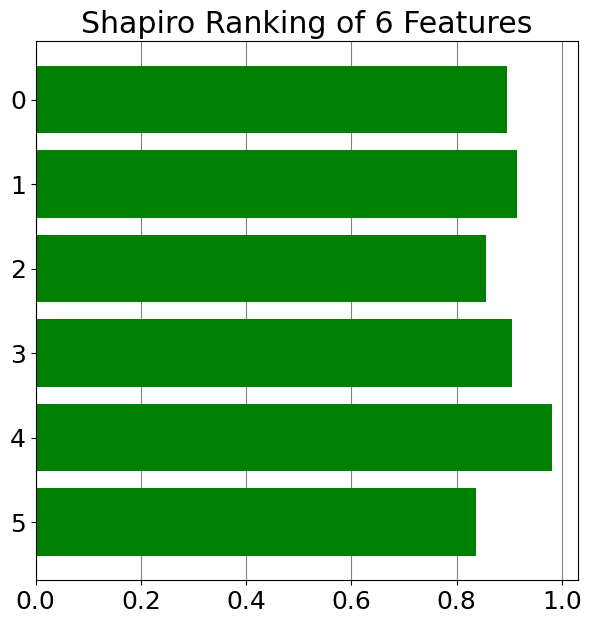

In [4]:
rank1d = Rank1D()
rank1d.plot_feature_ranks(X)

##### Rank 2D

<AxesSubplot: title={'center': 'Pearson Ranking of 6 Features'}>

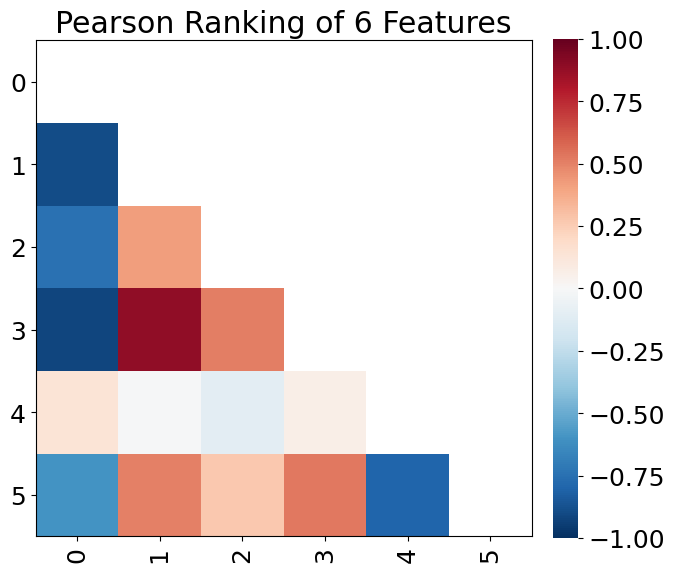

In [5]:
rank2d = Rank2D()
rank2d.plot_feature_ranks(X)